<a href="https://colab.research.google.com/github/Sean-Toroghi/Marketing-CausalInference/blob/main/P02_CustomerConvert_CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 02 - analyze and predict customer engagement

The __goal__  of this project is to analyze customer behaiours and predict the influentical factors in three main aspects: engagment, conversion, and churn. More specifically, this mini project represents evaluations about the influential factors that effects customer engagement, conversion, and churn.

For the customer engagement part, the target variable is cutomers' response to a marketing ads. Two methods are used:
- varioation of regression (ridge and lasso)
- LightGBM regressor

For the customer conversion part, the target variable is customers' subscriotion to a new service. Two methods are used to analyze the data:
- decision tree
- XGBoost

For the customer churn section, causal inference method is used to examine potential causes of customers' churn.

# Customer engagement analysis

Customer engagement rates are often the initial focus in marketing strategies, making them a crucial element of a comprehensive marketing framework. This study aims to analyze the customer engagement rate (target variable) by evaluating the impact of various independent variables in an email marketing campaign.

__Target variable__

The engagement in the dataset is defined as a binary outcome, in which 1 means a customer clicks on the link in an email of an insurance company as part of a broader marketing campaign.

__Independent variables__

The independent variables are categorized into continuous and categorical types:
- Continuous Variables: Income, customer lifetime value, monthly premium auto payment, months since the last claim, number of open complaints, number of policies, and total claim amount.
- Categorical Variables: Education level (ordinal) and gender (nominal).

__Methodology__

To understand the influence of different variables on the target variable (email response), several classification algorithms are employed. Based on their performance, the top two methods are selected to generate the final results.

Additionally, this study will explore potential interactions between the independent variables and their effects on the target variable. This analysis aims to uncover intrinsic relationships among the variables and their influence on customer engagement.

The performance of the models will be evaluated using the following metric:
- AUC-ROC
- Confusion matrix
- F1-score
- Specificity and sensivity


# EDA - preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# preprocessing, model algorithm
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, accuracy_score, classification_report

In [ ]:
# data
root = '/content/drive/MyDrive/Projects/Marketing/CausalInference/data/'
df = pd.read_csv(root + 'IBM_Watson_MarketingCustomerAnalysis.csv')
df.shape

(9134, 24)

## EDA

Data types, distribution of continous varibles, categorical distribution, target analysis

In [ ]:
print(f"Variables: \n{df.columns}")
print('====================================================================')
print(f"Data types: \n{df.dtypes}")
print('====================================================================')
# show only those columns with missing values and number of missing values
print(f"Missing values: \n{df.isnull().sum()[df.isnull().sum() > 0]}")
print('====================================================================')
print(f"Continous variables: \n{df.describe()}")
print('====================================================================')
print(f"Categorical variables: \n{df.describe(include='object')}")
print('====================================================================')
print(f"Ordinal categorical variable: \n{df.Education.value_counts()}")
print('====================================================================')
print(f"Nominal categorical variable: \n{df.Gender.value_counts()}")
print('====================================================================')
print(f"Target variable: \n{df['Response'].value_counts()}")

Variables: 
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
Data types: 
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status     

## Create plots to be used in report for the same analysis done above

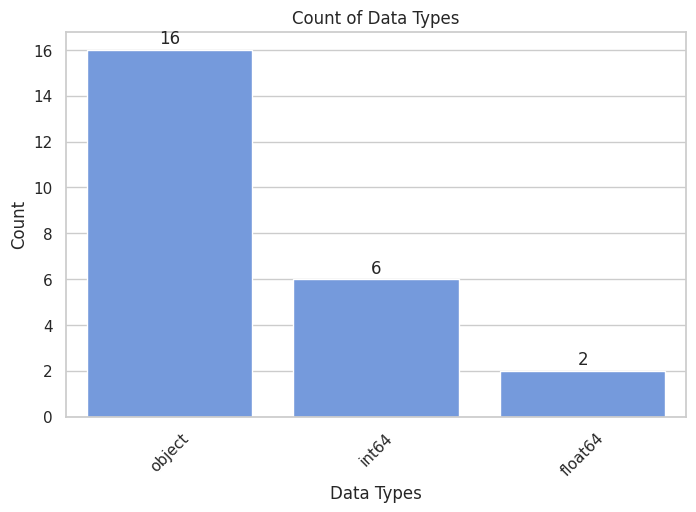

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# df = pd.read_csv('your_data.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# Data Types Count
data_types_count = df.dtypes.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=data_types_count.index.astype(str),
            y=data_types_count.values,
            color= 'cornflowerblue'
            )
# add values to the bars
for i, v in enumerate(data_types_count.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')


plt.title('Count of Data Types')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# missing values - no missing value
'''
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nsns.heatmap(df.isnull(), cbar=False, cmap='viridis')\nplt.title('Missing Values Heatmap')\nplt.xlabel('Columns')\nplt.ylabel('Rows')\nplt.show()\n"

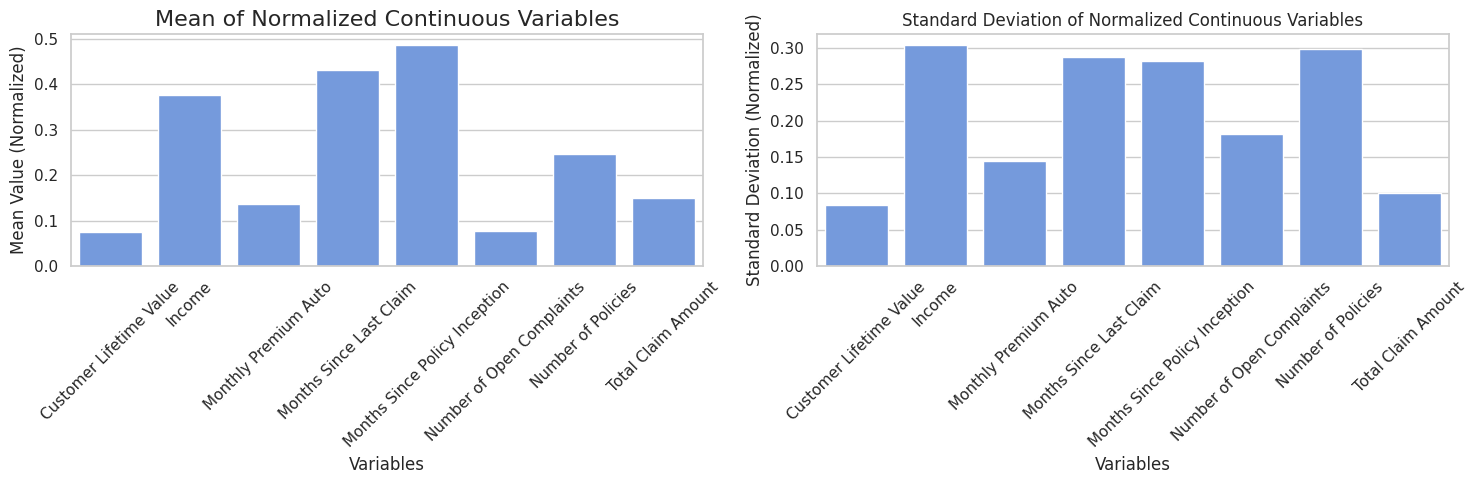

In [ ]:
# Continuous variables summary

from sklearn.preprocessing import MinMaxScaler

# Normalize the continuous variables
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include='number'))

# Create a DataFrame for normalized values
normalized_df = pd.DataFrame(normalized_data, columns=df.select_dtypes(include='number').columns)

# Plot the mean of normalized continuous variables and std
plt, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].set_title('Mean of Normalized Continuous Variables', fontsize=16)
sns.barplot(x=normalized_df.mean().index, y=normalized_df.mean().values, ax=axis[0], color='cornflowerblue')
axis[0].set_xlabel('Variables')
axis[0].set_ylabel('Mean Value (Normalized)')
axis[0].set_xticklabels(normalized_df.mean().index, rotation=45)

axis[1].set_title('Standard Deviation of Normalized Continuous Variables')
sns.barplot(x=normalized_df.std().index, y=normalized_df.std().values, ax=axis[1], color='cornflowerblue')
axis[1].set_xlabel('Variables')
axis[1].set_ylabel('Standard Deviation (Normalized)')
axis[1].set_xticklabels(normalized_df.std().index, rotation=45)

plt.tight_layout()
plt.show()




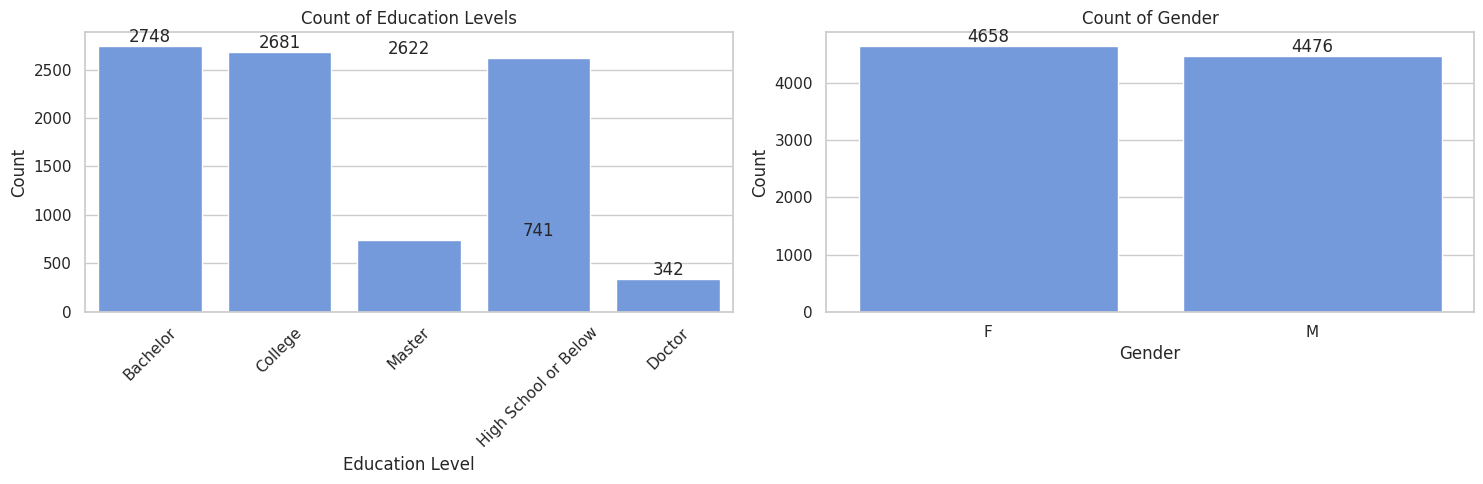

<Figure size 640x480 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axis = plt.subplots(1, 2, figsize=(15, 5))  # Ensure 'figsize' is correctly used

# Education
sns.countplot(data=df, x='Education', ax=axis[0], color='cornflowerblue')
# add values to the bars
for i, v in enumerate(df['Education'].value_counts().values):
    axis[0].text(i, v + 0.1, str(v), ha='center', va='bottom')
axis[0].set_title('Count of Education Levels')
axis[0].set_xlabel('Education Level')
axis[0].set_ylabel('Count')
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45)

# Gender
sns.countplot(data=df, x='Gender', ax=axis[1], color='cornflowerblue')
# add value to the bars
for i, v in enumerate(df['Gender'].value_counts().values):
    axis[1].text(i, v + 0.1, str(v), ha='center', va='bottom')
axis[1].set_title('Count of Gender')
axis[1].set_xlabel('Gender')
axis[1].set_ylabel('Count')
axis[1].set_xticklabels(axis[1].get_xticklabels())

# adjust the layout
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


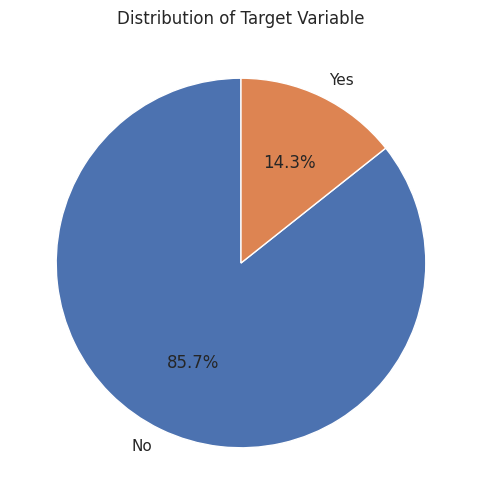

In [ ]:
# target distribution pie chart
plt.figure(figsize=(10, 6))
df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()

<Figure size 1200x600 with 0 Axes>

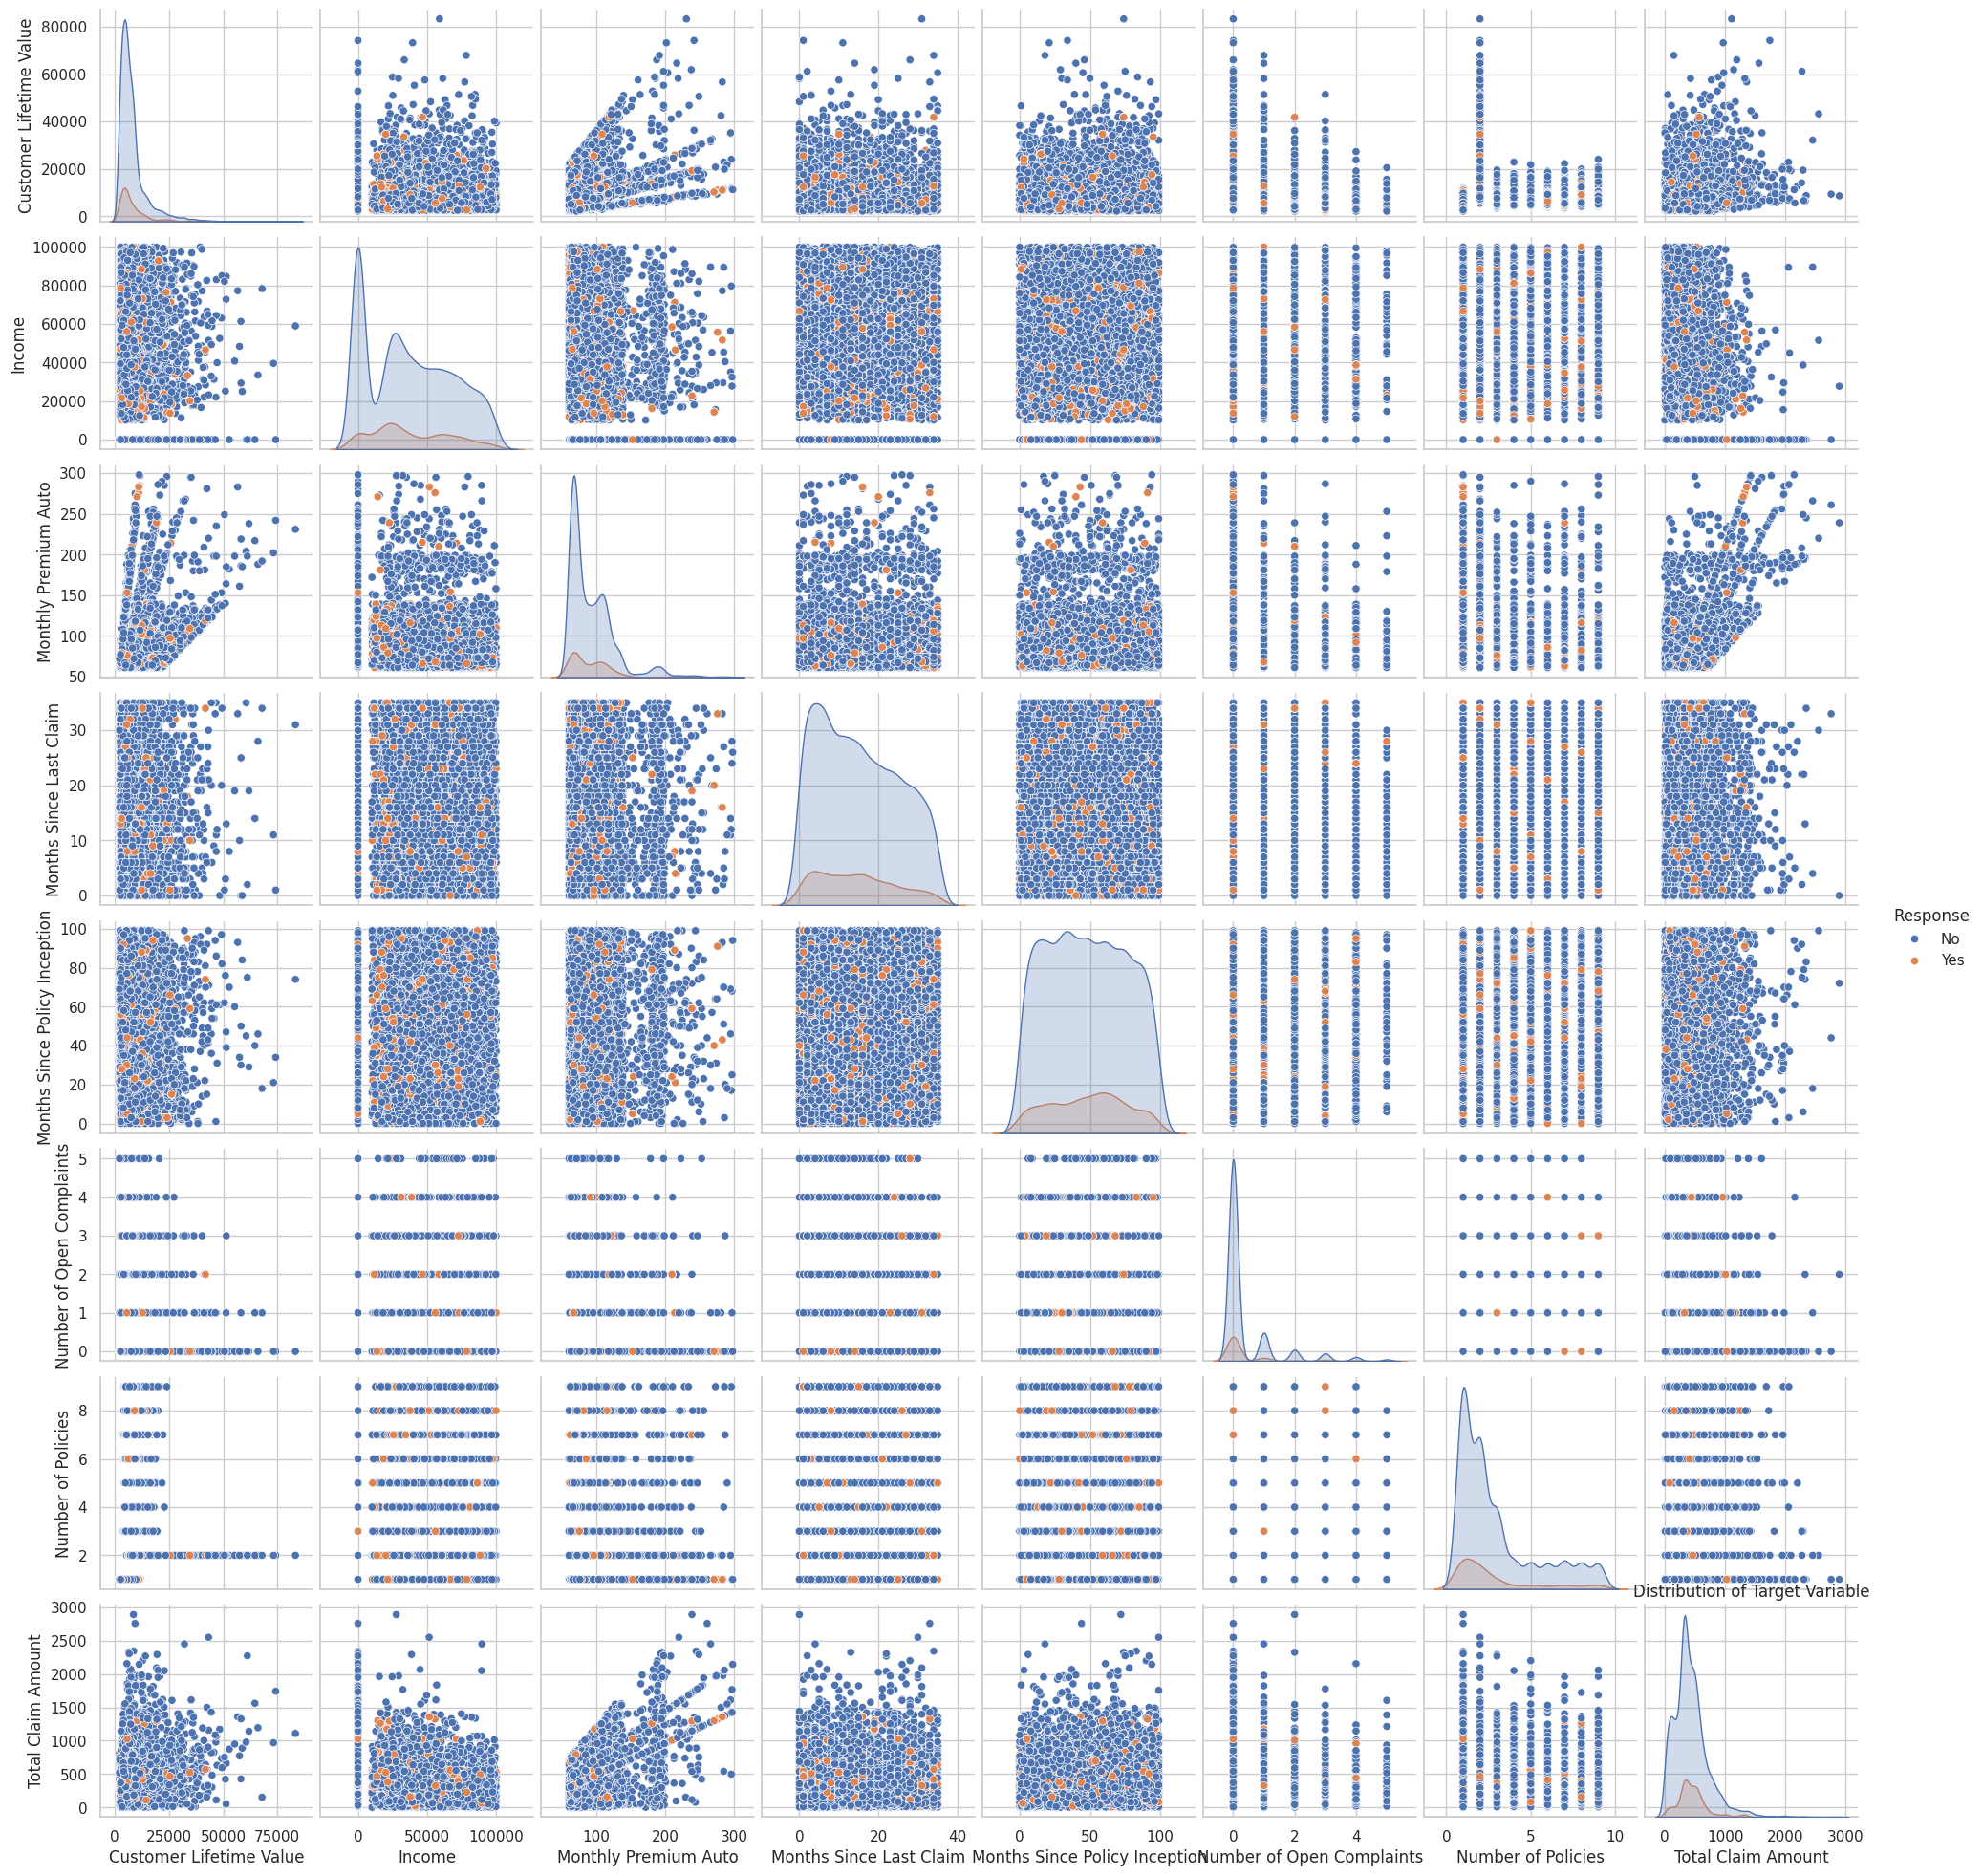

In [ ]:
# target variable - pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='Response')
plt.title('Distribution of Target Variable')
plt.show()

## Preprocessing

- convert target values: Yes: 1, No:0
- indentify continous and categorical variables
- convert categorical
  - ordinal: via Categorical method
  - nominal: via Factorize method


__Another method for encoding categorical variable is__ using `pd.get_dummies()` function, but that generates sparse matrix. For this project.

In [ ]:
# map target
mapping_taraget = {'Yes': 1, 'No': 0}
df['Response'] = df['Response'].map(mapping_taraget)

# indetify numerical and object variables
num_varbls = [x for x in df.columns if df[x].dtypes != 'object']
num_varbls.remove('Response')
obj_varbls = [x for x in df.columns if df[x].dtypes == 'object']
print (f"Count of object variables: {len(obj_varbls)}\nObject variables: {obj_varbls}")
print (f"Count of numerical variables: {len(num_varbls)}\nNumerical variables: {num_varbls}")

# categorical variables
# factorize Gender
df['Gender_conv'] = pd.factorize(df['Gender'])[0]
# ordinal categorical variable
df['Education_conv'] = pd.Categorical(df['Education'],
                                      categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

df['Education_conv'] = df['Education_conv'].cat.codes
df[['Gender', 'Gender_conv', 'Education', 'Education_conv']].head()

# Selected categorical variables
cat_varbls = ['Gender_conv', 'Education_conv']


Count of object variables: 15
Object variables: ['Customer', 'State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Count of numerical variables: 8
Numerical variables: ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


# Models

## Model 1- logistic regression

Four sub-models are generated with the following setups
1. model 1.1: only contionous variables
2. model 1.2: only encoded categorical variables
3. model 1.3: both continous and categorical (encoded) variables
4. model 1.4: selected continous and categorical variables, with intrinsic variables (cobination of more than one variable as a single variable)

### Initialize and train models

In [ ]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df, df['Response'], test_size=0.2, random_state=42)
print (f"Original sample size: {df.shape[0]}")
print (f"Train sample size: {X_train.shape[0]}")
print (f"Test sample size: {X_test.shape[0]}")

Original sample size: 9134
Train sample size: 7307
Test sample size: 1827


In [ ]:
import statsmodels.api as sm

# model 1.1 - logistic regression with contonous variables

model_1_1 = sm.Logit(X_train['Response'], # target variable
                     X_train[num_varbls]
                     ).fit()
print(f"Model 1.1 (only numerical variables) results:\n{model_1_1.summary()}")

# model 1.2 - logistic regression with categorical variables
model_1_2 = sm.Logit(X_train['Response'], # target variable
                     X_train[cat_varbls]
                     ).fit()
print(f"Model 1.2 (only categorical variables Gender and Education) results:\n{model_1_2.summary()}")

# model 1.3 - logistic regression. both numerical and categorical variables
model_1_3 = sm.Logit(X_train['Response'], # target variable
                     X_train[num_varbls + cat_varbls]
                     ).fit()
print (f"Model 1.3 (both numerical and categorical variables) results:\n{model_1_3.summary()}")

# model 1.4 - selected numerical, categorical, and intrinsic variables


Optimization terminated successfully.
         Current function value: 0.418246
         Iterations 6
Model 1.1 (only numerical variables) results:
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 7307
Model:                          Logit   Df Residuals:                     7299
Method:                           MLE   Df Model:                            7
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                -0.02096
Time:                        16:09:02   Log-Likelihood:                -3056.1
converged:                       True   LL-Null:                       -2993.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value 

### Evaluate models

In [ ]:
# examine the model with test set
pred_1_1 = model_1_1.predict(X_test[num_varbls])
pred_1_2 = model_1_2.predict(X_test[cat_varbls])
pred_1_3 = model_1_3.predict(X_test[num_varbls + cat_varbls])


In [ ]:
# Employ metrics to evaluate logistic regression
# model 1
print(f"Model 1 (only numerical variables) AUC-ROC score: {roc_auc_score(y_test, pred_1_1)}")
# model 2
print(f"Model 2 (only categorical variables) AUC-ROC score: {roc_auc_score(y_test, pred_1_2)}")
# model 3
print(f"Model 3 (both numerical and categorical variables) AUC-ROC score: {roc_auc_score(y_test, pred_1_3)}")

# Confusion matrix
print(f"Model 1 (only numerical variables) Confusion matrix:\n{confusion_matrix(y_test, np.round(pred_1_1))}")
print(f"Model 2 (only categorical variables) Confusion matrix:\n{confusion_matrix(y_test, np.round(pred_1_2))}")
print(f"Model 3 (both numerical and categorical variables) Confusion matrix:\n{confusion_matrix(y_test, np.round(pred_1_3))}")

# classification report
print(f"Model 1 (only numerical variables) Classification report:\n{classification_report(y_test, np.round(pred_1_1))}")
print(f"Model 2 (only categorical variables) Classification report:\n{classification_report(y_test, np.round(pred_1_2))}")
print(f"Model 3 (both numerical and categorical variables) Classification report:\n{classification_report(y_test, np.round(pred_1_3))}")

Model 1 (only numerical variables) AUC-ROC score: 0.495106279471902
Model 2 (only categorical variables) AUC-ROC score: 0.4676441263312028
Model 3 (both numerical and categorical variables) AUC-ROC score: 0.49157808037068973
Model 1 (only numerical variables) Confusion matrix:
[[1561    0]
 [ 266    0]]
Model 2 (only categorical variables) Confusion matrix:
[[1561    0]
 [ 266    0]]
Model 3 (both numerical and categorical variables) Confusion matrix:
[[1561    0]
 [ 266    0]]
Model 1 (only numerical variables) Classification report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1561
           1       0.00      0.00      0.00       266

    accuracy                           0.85      1827
   macro avg       0.43      0.50      0.46      1827
weighted avg       0.73      0.85      0.79      1827

Model 2 (only categorical variables) Classification report:
              precision    recall  f1-score   support

           0     

# Results and discussion

### Model 1 - numerical variables
- 'Customer Lifetime Value',
- 'Income',
- 'Monthly Premium Auto',
- 'Months Since Last Claim',
- 'Months Since Policy Inception',
- 'Number of Open Complaints',
- 'Number of Policies',
- 'Total Claim Amount'



```
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.018e-06   5.65e-06     -1.065      0.287   -1.71e-05    5.05e-06
Income                        -2.845e-06   1.17e-06     -2.436      0.015   -5.13e-06   -5.56e-07
Monthly Premium Auto             -0.0085      0.001     -6.237      0.000      -0.011      -0.006
Months Since Last Claim          -0.0220      0.003     -7.050      0.000      -0.028      -0.016
Months Since Policy Inception    -0.0048      0.001     -4.441      0.000      -0.007      -0.003
Number of Open Complaints        -0.1033      0.039     -2.653      0.008      -0.180      -0.027
Number of Policies               -0.0940      0.014     -6.514      0.000      -0.122      -0.066
Total Claim Amount                0.0001      0.000      0.792      0.428      -0.000       0.000
=================================================================================================
```
Looking at the model summary we can inferenc the following:

- 'Customer Lifetime Value': the P-value is higher than 0.05, illustrating the customer lifetime value does not have a statisticallty impact on engagement (null hyp. says there is no impact of this variable on the target variable)
- 'Income': while p-value is less than 0.05, the coefficinet is close to zero, meaning the impact of the income on engagement is very small.
- 'Total Claim Amount': with p-value > 0.05 suggesting no impact on engagement.

The following variables all have p-value < 0.05, indicating they have impact on engagement:
- 'Number of Open Complaints' and 'Number of Policies' have the highest coef. value (absolute), meaning the customer with higher number of open claims or customers with higher number of policies have the lowest likelihood to respond to marketing campaign.
- 'Monthly Premium Auto': customers that pays higher monthly premiums are less likely to response to marketing campaign.
- 'Months Since Last Claim': customers with more recent filed claim are the most likely to respose to marketing campaign.
- 'Months Since Policy Inception': customers that are closer to the renewabl of their policy are more likely to response to marketing campaign.

According to the results, the have the higher effectiveness, marketing campaign needs to target customers that their policy is close to renewal date, have recently file a claim. Furthermore, high-value customers (customers paying higher premiums, file less claims, or have multiple policies) are harder to encourage engagement and require to prvode more incentives to them.







### Model 2 : categorical only (Education and Gender)

```
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender_conv       -1.1428      0.052    -21.784      0.000      -1.246      -1.040
Education_conv    -0.6278      0.023    -26.793      0.000      -0.674      -0.582
==================================================================================
```

__Gender__: Model shows Females are more likely to respond than Males.

__Education__: customers with higher education level are less liekly to repspond.


### Model 3 - categorical and numerical variables

```
                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.077e-06   5.64e-06     -1.078      0.281   -1.71e-05    4.98e-06
Income                        -2.584e-06   1.17e-06     -2.201      0.028   -4.88e-06   -2.83e-07
Monthly Premium Auto             -0.0082      0.001     -5.895      0.000      -0.011      -0.005
Months Since Last Claim          -0.0212      0.003     -6.694      0.000      -0.027      -0.015
Months Since Policy Inception    -0.0046      0.001     -4.166      0.000      -0.007      -0.002
Number of Open Complaints        -0.1012      0.039     -2.600      0.009      -0.178      -0.025
Number of Policies               -0.0910      0.014     -6.286      0.000      -0.119      -0.063
Total Claim Amount                0.0002      0.000      0.981      0.327      -0.000       0.001
Gender_conv                      -0.1521      0.065     -2.338      0.019      -0.280      -0.025
Education_conv                   -0.0074      0.030     -0.247      0.805      -0.066       0.051
=================================================================================================
```

Combining the two type of variables, show the mdoel cannot find _education level, customer life time value, and total amount of claim_ statistically significant enough to impact engagement.

Female customers, customers that their policy is closer for renewal, and customers with less number of open claims are more likely to respond.

High value customers (paying higher premium, having more policies, or not filing a claim for longer period) or customers with higher number of complains are less likely to respond.



### Model performance:
- numerical variable only
- categorical variable only
- numerical and categorical variables

# Model - interaction variables

## Prepare data and modeling

## Results

## Model evaluation